In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

anscombe = sns.load_dataset("anscombe")
sns.set(style="white")

# Summary Statistics Explained

**1. Mean of x and y**  
- Measures the average value.  
- `np.mean(x)` → mean of x  
- `np.mean(y)` → mean of y  

**2. Sample variance of x and y**  
- Measures how spread out the data is.  
- `np.var(x, ddof=1)` → sample variance of x  
- `np.var(y, ddof=1)` → sample variance of y  
- `ddof=1` ensures we calculate **sample variance** (divides by n-1)  

**3. Correlation between x and y**  
- Shows how x and y change together.  
- `np.corrcoef(x, y)[0, 1]` → correlation coefficient between x and y  
- Values range from -1 (perfect negative) to 1 (perfect positive)  

**4. Linear regression line**  
- Finds the line of best fit: `y = slope * x + intercept`  
- Use `stats.linregress(x, y)` from SciPy:  
  ```python
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


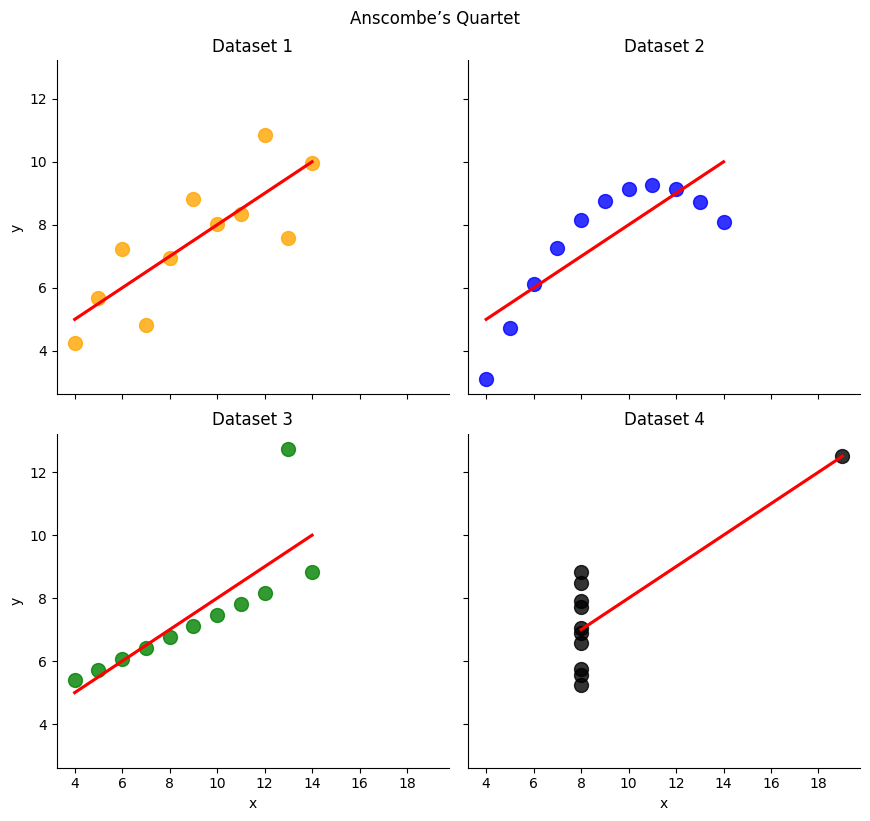

In [108]:
g = sns.lmplot(
    data=anscombe,
    x="x",
    y="y",
    col="dataset",    # one plot per dataset
    col_wrap=2,
    ci=None,
    height=4,
    aspect = 1.1,
    scatter_kws={"s":100},  # point size
)

titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]
colours = ["orange", "blue", "green", "black"]

for ax, title, colour in zip(g.axes, titles, colours):
    ax.set_title(title)

    for collection in ax.collections:
        collection.set_facecolor(colour)
        collection.set_edgecolor(colour)

    ax.lines[0].set_color("red")

plt.suptitle("Anscombe’s Quartet", y=1.02)
plt.show()

In [113]:
def dataset_stats(df, name):
    x = df["x"]
    y = df["y"]
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)   # sample variance (ddof=1)
    var_y = np.var(y, ddof=1)
    corr = np.corrcoef(x, y)[0, 1]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value**2
    
    return {
        "Dataset": name,
        "Mean x": round(mean_x, 2),
        "Mean y": round(mean_y, 2),
        "Var x": round(var_x, 2),
        "Var y": round(var_y, 2),
        "Correlation": round(corr, 3),
        "Slope": round(slope, 3),
        "Intercept": round(intercept, 3),
        "R²": round(r_squared, 3)
    }

# Calculate for all 4 datasets
results = []
for dataset_name, group in anscombe.groupby("dataset"):
    results.append(dataset_stats(group, dataset_name))

# Put into a table
stats_df = pd.DataFrame(results)
print(stats_df)

  Dataset  Mean x  Mean y  Var x  Var y  Correlation  Slope  Intercept     R²
0       I     9.0     7.5   11.0   4.13        0.816    0.5      3.000  0.667
1      II     9.0     7.5   11.0   4.13        0.816    0.5      3.001  0.666
2     III     9.0     7.5   11.0   4.12        0.816    0.5      3.002  0.666
3      IV     9.0     7.5   11.0   4.12        0.817    0.5      3.002  0.667
